***

# R2.07
## TP1. Exemples de graphes

***
***

Dans ce TP tous les graphes seront non-orientés.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

***
# <font color=blue>Quelques matrices d'adjacence</font> #
***

**To Do:**

**_question 1_**

En utilisant le cours, écrire un programme qui renvoie la matrice d'adjacence du graphe complet à $n$ sommets.

In [2]:

def complet(n):
    """
     Renvoie la matrice d'adjacence du graphe complet à $n$ sommets

    :param n: nombre de sommets
    :type n:  int
    :return: matrice d'adjacence du graphe complet à $n$ sommets
    :rtype: numpy array of int
    """

    A=np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
        	A[i][j]=1
        	A[j][i]=1        	
                
    return A
    


**_question 2_**

Même question en partant de <tt>np.ones </tt>.

Comparer les deux méthodes

In [3]:

def complet2(n):
    """
     Renvoie la matrice d'adjacence du graphe complet à $n$ sommets

    :param n: nombre de sommets
    :type n:  int
    :return: matrice d'adjacence du graphe complet à $n$ sommets
    :rtype: numpy array of int
    """
    A=np.ones((n,n))
    for i in range(n):
        A[i][i]=0
    return A

**bonus** Même questions pour les autres familles de graphes décrites dans le cours.

*****
**To Do:**


**_question 3_**

Écrire un programme résumant les informations essentielles sur le graphe :
* son ordre (le nombre de sommet)
* sa taille (le nombre d'arêtes)
* la liste des degrés


In [4]:
def info(A):
    """
     Renvoie caractéristiques essentielles du graphe représenté par la matrice d'adjcence A

    :param A: matrice d'adjacence
    :type A:  numpy array carrée 
    :return: ordre [nombre de sommet] (int), taille [nombre d'arêtes] (int) et liste des degrés (array of int)
    :rtype: numpy array of int, int, numpy array
    """
    order=A.shape[0]
    
    deg=np.zeros(order,int)
    
    
    for i in range(order):  #for each line
        deg[i]=deg[i]+A[i][i] #take into account that loops are counted double for degree

        for j in range(order): #for each column
            deg[i]=deg[i]+A[i][j]

            
    size=int(sum(deg)/2)    #lemme des poignées de mains    
    return [order,size,deg]
    


Il est toujours agréable d'avoir un support visuel. Pour cela (et pour bien d'autres applications), on va utiliser le module <tt>networkx</tt>.

La doc se trouve [ici](https://networkx.org/documentation/stable/index.html)


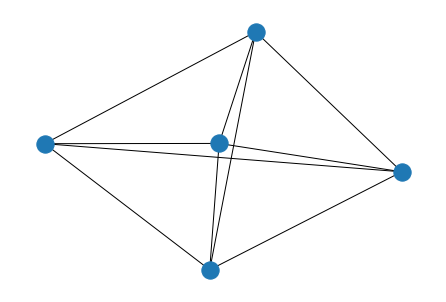

In [5]:
A=complet(5)
G=nx.from_numpy_array(A)
#aller voir dans la doc comment fonctionne from_numpy_array
nx.draw(G)

*****
**To Do:**


**_question 4_**

Définir la matrice d'adjacence du graphe taureau, puis dessiner ce graphe à l'aide de networkx.

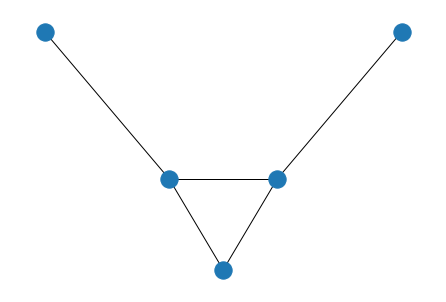

In [6]:
#en profiter pour aller voir la doc networkx sur la fonction draw
B=np.array(
[[0,1,0,0,0], 
[1,0,1,1,0], 
[0,1,0,1,0], 
[0,1,1,0,1],
[0,0,0,1,0]])
G=nx.from_numpy_array(B)
nx.draw(G,pos=nx.spectral_layout(G))

**_question 5_**

Que fait ce morceau de code ? Adapter le un petit peu selon vos envies.

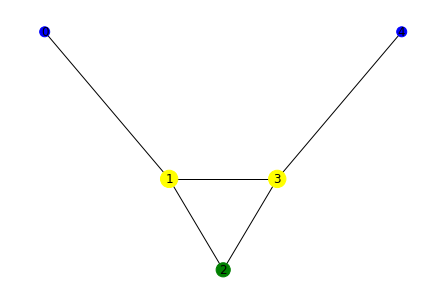

In [7]:
d = info(B)[2]

map_col=['black','blue','green','yellow','orange','red','purple']

def col_deg(d,m=map_col):
    return [m[i] for i in d ]

nx.draw(G, nodelist=range(len(d)), node_size=[v * 100 for v in d],node_color=col_deg(d),with_labels=True,pos=nx.spectral_layout(G))
plt.show()

**Bonus** à l'aide du paramètre <tt>node_size</tt>, dessiner le graphe tel que la taille de chaque sommet soit proportionnelle à son degré.

***
#  <font color=blue>Quelques graphes aléatoires</font> #
***


Pour des raisons de modélisation ou de test, il peut être utile de créer des graphes aléatoire plutôt que de prendre des exemples dans des familles prédéfinies.

On va voir deux constructions classique de graphes aléatoires : les graphes d'Erdös-Renyi et le modèle stochastique par bloc (SBM).




## Graphe d'Erdös-Renly

Le graphe d'Erdös-Renly de paramètre $n$ et $p$ est le graphe d'ordre $n$ tel que deux sommets sont reliés avec probabilité $p$.

Concrètement, on le construit en partant d'une matrice  nulle de taille $n \times n$ puis en ajoutant avec probabilité $p$ l'arête entre $i$ et $j$ (attention, les graphes sont non-orientés donc $iAj \Longleftarrow jAi$).

Une manière d'obtenir cette probabilité est de tirer une pièce biaisée avec <tt>np.random.binomial(1,p)</tt>


**_question 7_**

écrire une fonction <tt>ErdoxRenly</tt> qui créé la matrice d'adjacence d'un graphe d'Erdos-Renly


Tracer ce graphe à l'aide de networkx

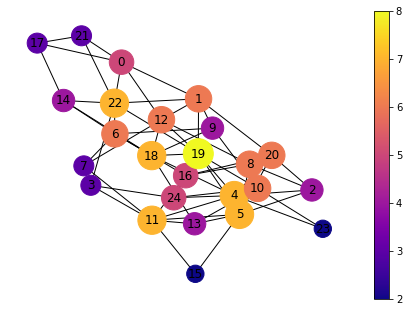

In [8]:
def ErdosRenly(n,p):
    """
     Renvoie la matrice d'adjacence d'un graphe d'Erdös-Renly

    :param n: nombre de sommets
    :type n:  int
    :param p: probabilité d'arête
    :type p:  float entre 0 et 1    
    :return: matrice d'adjacence 
    :rtype: numpy array of int
    """

    A=np.zeros((n,n),int)
    
    ki=0 #current connected component
    for i in range(n):
        for j in range(i):
            A[i][j]=np.random.binomial(1,p)
            A[j][i]=A[i][j]       
    return A



cmap = plt.cm.plasma


ER=ErdosRenly(25, 0.25)

GER=nx.from_numpy_matrix(ER)


d = info(ER)[2]


def col_deg(d,m=map_col):
    return [m[i] for i in d ]

nx.draw(GER, nodelist=range(len(d)), node_size=[(v+1) * 100 for v in d],node_color=d,with_labels=True,cmap=cmap,pos=nx.spring_layout(GER))


vmin=d.min()
vmax=d.max()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()

## Graphe stochastique par blocs

Le modèle stochastique par bloc est plus complexe, mais offre de nombreuses possibilités de modélisation, notamment de reseaux sociaux. 
L'idée est de partir d'une liste de $k$ communautés $[c_1,c_2,...,c_k]$, où $c_i$ est la taille de la communauté $i$, puis d'ajouter les arêtes au fur et à mesure selon la règle "si $i$ et $j$ sont dans la même communauté, ils sont liés avec probabilité $p_{in}$, s'ils ne sont pas dans la même communauté ils sont liés avec probabilité $p_{out}$".


**_question 8_**

écrire une fonction <tt>SMB_homebrew</tt> qui créé la matrice d'adjacence d'un graphe stochastique par blocs.


Tracer ce graphe à l'aide de networkx

45
[10 25 45]


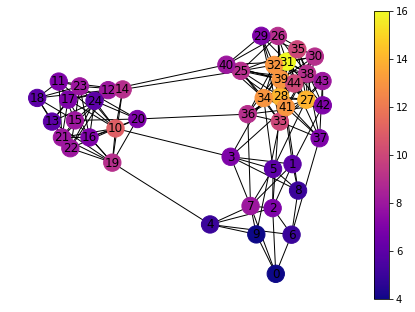

In [9]:
#SBM homebrew

def SBM_homebrew(array,pin,pout):
    """
     Renvoie la matrice d'adjacence d'un SBM

    :param array: tailles des différentes communautés
    :type array:  array of int
    :param pin: probabilité d'arête à l'intérieur d'une communauté
    :type pin:  float entre 0 et 1    
    :param pout: probabilité d'arête entre deux communautés
    :type pout:  float entre 0 et 1       
    :return: matrice d'adjacence 
    :rtype: numpy array of int
    """
    n=np.sum(array)
    ncum=np.cumsum(array)
    
    print(n)
    A=np.zeros((n,n),int)
    print(ncum)
    
    ki=0 #current connected component
    for i in range(n):
        if i>=ncum[ki]:
            ki=ki+1
            #print("i,ki",i,ki)
        kj=ki #current connected component
        for j in range(i+1,n):
            if j>=ncum[kj]:
                kj=kj+1
                #print("i,ki,j,kj",i,ki,j,kj)
               
            if ki==kj:
                A[i][j]=np.random.binomial(1,pin)
                A[j][i]=A[i][j]
            else:
                A[i][j]=np.random.binomial(1,pout)
                A[j][i]=A[i][j]          
    return A

ASBM=SBM_homebrew([10,15,20], 0.5, 0.02)

GSBM=nx.from_numpy_matrix(ASBM)




d = info(ASBM)[2]


def col_deg(d,m=map_col):
    return [m[i] for i in d ]

nx.draw(GSBM, nodelist=range(len(d)),node_color=d,with_labels=True,cmap=cmap,pos=nx.spring_layout(GSBM))


vmin=d.min()
vmax=d.max()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()

**Bonus :** à l'aide de Networkx, améliorer l'affichage de ces graphes. En particulier il serait intéressant de colorier les sommets en fonction de leurs degrés (qui peut être grand dans ce cas). Le mot clef <tt>cmap</tt> pourra être utile.